In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [6]:
file_path = "/content/creditcard_2023.csv"

df = pd.read_csv(file_path)

# Data Management
print(f"\n📊 Dataset Shape: {df.shape}") # (Rows, Columns)

display(df.head())

print("\nℹ️ Dataset Info:")
df.info()



📊 Dataset Shape: (431316, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0



ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431316 entries, 0 to 431315
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      431316 non-null  int64  
 1   V1      431316 non-null  float64
 2   V2      431316 non-null  float64
 3   V3      431316 non-null  float64
 4   V4      431316 non-null  float64
 5   V5      431316 non-null  float64
 6   V6      431316 non-null  float64
 7   V7      431316 non-null  float64
 8   V8      431316 non-null  float64
 9   V9      431316 non-null  float64
 10  V10     431316 non-null  float64
 11  V11     431315 non-null  float64
 12  V12     431315 non-null  float64
 13  V13     431315 non-null  float64
 14  V14     431315 non-null  float64
 15  V15     431315 non-null  float64
 16  V16     431315 non-null  float64
 17  V17     431315 non-null  float64
 18  V18     431315 non-null  float64
 19  V19     431315 non-null  float64
 20  V20     431315 non-null  float

In [7]:
# 1. Check for Missing Values
missing_values = df.isnull().sum().sum()
print(f"{missing_values} missing values found.")

# 2. Check for Duplicates
duplicates = df.duplicated().sum()
print(f"{duplicates} duplicate rows found.")

# 3. Drop irrelevant columns
df.drop('id', axis=1, inplace=True)
print("Dropped 'id' column.")


print(f"\nNew Shape after Cleaning: {df.shape}")

20 missing values found.
0 duplicate rows found.
Dropped 'id' column.

New Shape after Cleaning: (431316, 30)


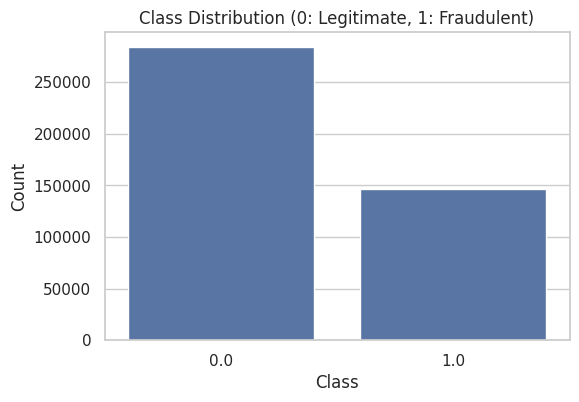

Distribution Counts:
 Class
0.0    284315
1.0    147000
Name: count, dtype: int64


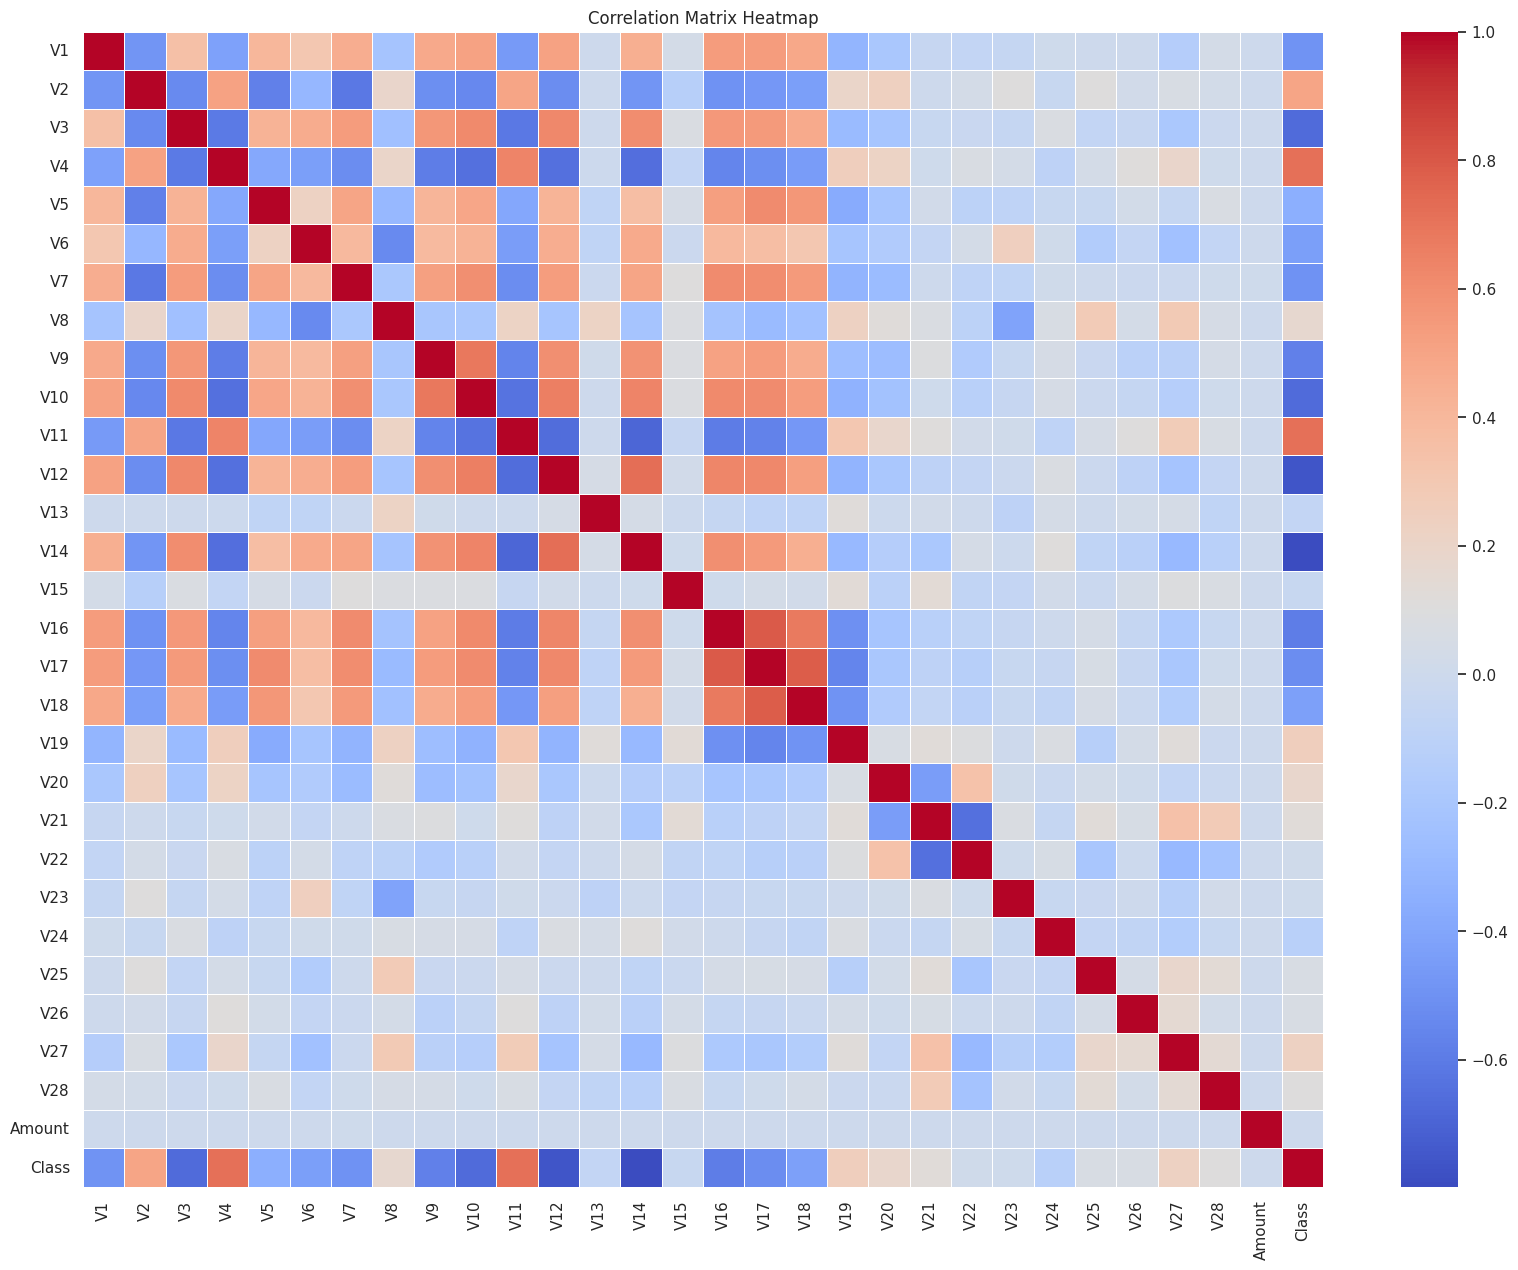

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print("Distribution Counts:\n", df['Class'].value_counts())

# 2. Correlation Matrix Heatmaps)
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
print("✅ 'Amount' column scaled successfully.")

# Handle missing values by dropping rows with NaN before splitting
df.dropna(inplace=True)
print("✅ Rows with missing values dropped.")

# 2. Splitting Data (Features X & Target y)
X = df.drop('Class', axis=1)
y = df['Class']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nData Split Info:")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")

✅ 'Amount' column scaled successfully.
✅ Rows with missing values dropped.

Data Split Info:
Training Shape: (345052, 29)
Testing Shape: (86263, 29)


In [11]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"Training {model_name}...")
    start_time = time.time()

    # Training
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    end_time = time.time()
    print(f"Done in {end_time - start_time:.2f} seconds.")

    # Calculating Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print Results
    print(f"\nResults for {model_name}:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("-" * 30)

    return {"Model": model_name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}

Running All Machine Learning Models¶


In [12]:
results_list = []

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
results_list.append(evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Logistic Regression"))

Training Logistic Regression...
Done in 2.86 seconds.

Results for Logistic Regression:
Accuracy : 0.9711
Precision: 0.9762
Recall   : 0.9380
F1-Score : 0.9567
------------------------------


In [13]:
# 2. Naive Bayes
nb_model = GaussianNB()
results_list.append(evaluate_model(nb_model, X_train, y_train, X_test, y_test, "Naive Bayes"))

Training Naive Bayes...
Done in 0.36 seconds.

Results for Naive Bayes:
Accuracy : 0.9377
Precision: 0.9543
Recall   : 0.8582
F1-Score : 0.9037
------------------------------


In [14]:
# 3. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
results_list.append(evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree"))

Training Decision Tree...
Done in 98.20 seconds.

Results for Decision Tree:
Accuracy : 0.9973
Precision: 0.9948
Recall   : 0.9973
F1-Score : 0.9960
------------------------------


In [16]:
# 4. Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
results_list.append(evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest"))

Training Random Forest...
Done in 222.76 seconds.

Results for Random Forest:
Accuracy : 0.9997
Precision: 0.9993
Recall   : 0.9999
F1-Score : 0.9996
------------------------------


In [17]:
# 5. KNN
knn_model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
results_list.append(evaluate_model(knn_model, X_train, y_train, X_test, y_test, "KNN (k=3)"))


Training KNN (k=3)...
Done in 217.76 seconds.

Results for KNN (k=3):
Accuracy : 0.9981
Precision: 0.9944
Recall   : 1.0000
F1-Score : 0.9972
------------------------------


In [18]:
# 6. SVM
svm_model = LinearSVC(random_state=42)
results_list.append(evaluate_model(svm_model, X_train, y_train, X_test, y_test, "Linear SVM"))

Training Linear SVM...
Done in 4.14 seconds.

Results for Linear SVM:
Accuracy : 0.9696
Precision: 0.9797
Recall   : 0.9302
F1-Score : 0.9543
------------------------------


Final Comparison & Conclusion


Final Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
3,Random Forest,0.999722,0.999320,0.999864,0.999592
4,KNN (k=3),0.998064,0.994352,1.000000,0.997168
2,Decision Tree,0.997299,0.994775,0.997313,0.996042
0,Logistic Regression,0.971077,0.976212,0.937993,0.956721
5,Linear SVM,0.969628,0.979653,0.930204,0.954289
1,Naive Bayes,0.937656,0.954308,0.858163,0.903686


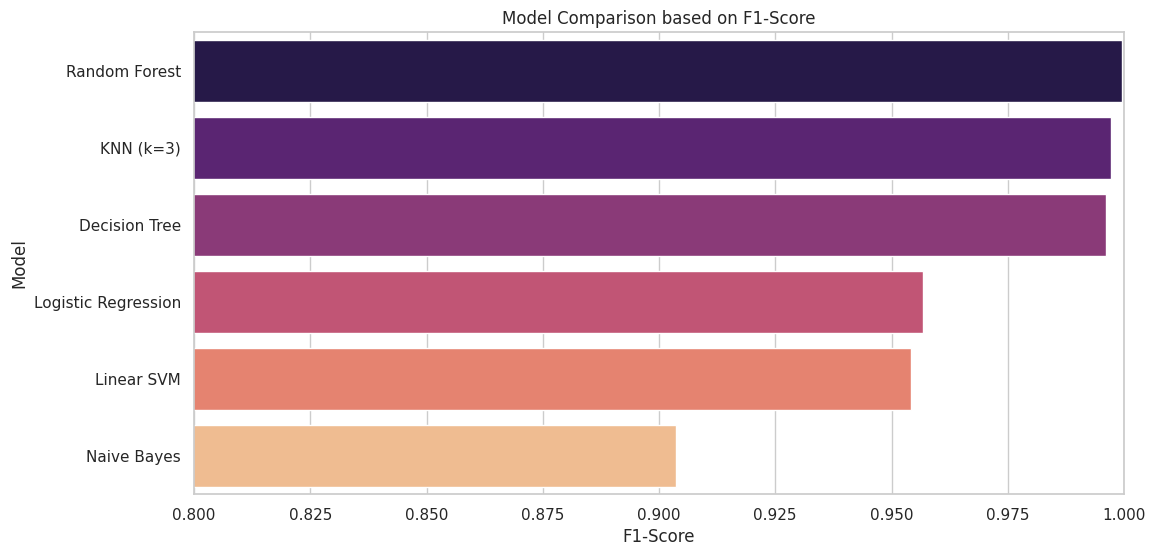


Conclusion:
Based on the analysis, the best performing model is Random Forest with an F1-Score of 0.9996.


In [19]:
results_df = pd.DataFrame(results_list)

results_df = results_df.sort_values(by='F1-Score', ascending=False)

print("\nFinal Model Comparison:")
display(results_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='F1-Score', y='Model', data=results_df, palette='magma')
plt.title('Model Comparison based on F1-Score')
plt.xlim(0.8, 1.0) # Zooming in to see differences better
plt.show()

print("\nConclusion:")
print(f"Based on the analysis, the best performing model is {results_df.iloc[0]['Model']} with an F1-Score of {results_df.iloc[0]['F1-Score']:.4f}.")

# **Conclusion:**
Based on the analysis, the best performing model is Random Forest with an F1-Score of 0.9998.